# VencoPy Tutorial 5

This tutorial aims to give a more in depth overview into the flexEstimator class and showcases some features that can be customised.

In [12]:
import sys
import os
from os import path
import pandas as pd
from pathlib import Path
import pathlib
#from ruamel.yaml import YAML

sys.path.append(path.dirname(path.dirname(path.dirname(Path.cwd()))))

from vencopy.classes.dataParsers import DataParser
from vencopy.classes.tripDiaryBuilders import TripDiaryBuilder
from vencopy.classes.gridModelers import GridModeler
from vencopy.classes.flexEstimators import FlexEstimator
from vencopy.classes.evaluators import Evaluator
from vencopy.scripts.globalFunctions import loadConfigDict, createOutputFolders

print("Current working directory: {0}".format(os.getcwd()))


Current working directory: C:\8_Work\VencoPy\vencopy_internal\vencopy\vencopy\tutorials\tutorial_05


In [13]:
configNames = ('globalConfig', 'localPathConfig', 'parseConfig', 'tripConfig', 'gridConfig', 'flexConfig', 'evaluatorConfig')
configDict = loadConfigDict(configNames)

# Adapt relative paths in config for tutorials
configDict['globalConfig']['pathRelative']['plots'] = Path.cwd().parent.parent / configDict['globalConfig']['pathRelative']['plots']
configDict['globalConfig']['pathRelative']['parseOutput'] = Path.cwd().parent.parent / configDict['globalConfig']['pathRelative']['parseOutput']
configDict['globalConfig']['pathRelative']['diaryOutput'] = Path.cwd().parent.parent / configDict['globalConfig']['pathRelative']['diaryOutput']
configDict['globalConfig']['pathRelative']['gridOutput'] = Path.cwd().parent.parent / configDict['globalConfig']['pathRelative']['gridOutput']
configDict['globalConfig']['pathRelative']['flexOutput'] = Path.cwd().parent.parent / configDict['globalConfig']['pathRelative']['flexOutput']
configDict['globalConfig']['pathRelative']['evalOutput'] = Path.cwd().parent.parent / configDict['globalConfig']['pathRelative']['evalOutput']

# Set reference dataset
datasetID = 'MiD17'

# Modify the localPathConfig file to point to the .csv file in the sampling folder in the tutorials directory where the dataset for the tutorials lies.
configDict['localPathConfig']['pathAbsolute'][datasetID] = pathlib.Path.cwd().parent / 'data_sampling'

# Similarly we modify the datasetID in the global config file
configDict['globalConfig']['files'][datasetID]['tripsDataRaw'] = datasetID + '.csv'

# We also modify the parseConfig by removing some of the columns that are normally parsed from the MiD, which are not available in our semplified test dataframe
del configDict['parseConfig']['dataVariables']['hhID']
del configDict['parseConfig']['dataVariables']['personID']


## FlexEstimator config file

The FlexEstimator config file contains the technical specifications..

In [14]:
#yaml.dump(configDict['flexConfig'], sys.stdout)

## _FlexEstimator_ class

To use the FlexEstimator class, we first need to run the DataParses as this is an argument to the FlexEstimator class.

In [15]:
vpData = DataParser(datasetID=datasetID, configDict=configDict, loadEncrypted=False)
vpData.process()

Parsing properties set up
Starting to retrieve local data file from C:\8_Work\VencoPy\vencopy_internal\vencopy\vencopy\tutorials\data_sampling\MiD17.csv
Finished loading 2124 rows of raw data of type .csv
Finished harmonization of variables
Starting filtering, applying 8 filters.
The following values were taken into account after filtering:
{'isMIVDriver': 1287,
 'tripDistance': 1948,
 'tripEndClock': 2124,
 'tripEndHour': 2124,
 'tripIsIntermodal': 1682,
 'tripPurpose': 2115,
 'tripStartClock': 2124,
 'tripStartHour': 2124}
All filters combined yielded a total of 950 was taken into account
This corresponds to 44.72693032015066 percent of the original data
Finished harmonization of ID variables
Parsing completed


In [16]:
# Estimate charging flexibility based on driving profiles and charge connection
vpFlex = FlexEstimator(configDict=configDict, datasetID=datasetID, ParseData=vpData)
vpFlex.baseProfileCalculation()
vpFlex.filter()
vpFlex.aggregate()
vpFlex.correct()
vpFlex.normalize()
vpFlex.writeOut()

Reading Venco input scalars, drive profiles and boolean plug profiles
There are 267 drive profiles and 267 plug profiles.
Flex Estimator initialization complete
Starting with iteration 0
9979.88276923077
Starting with iteration 1
0.0
Starting with iteration 2
0.0
0.0
0.0
0.0
Base profile calculation complete for dataset MiD17
There are 263 considered profiles and 262 DSM eligible profiles.


Evaluator initialization complete


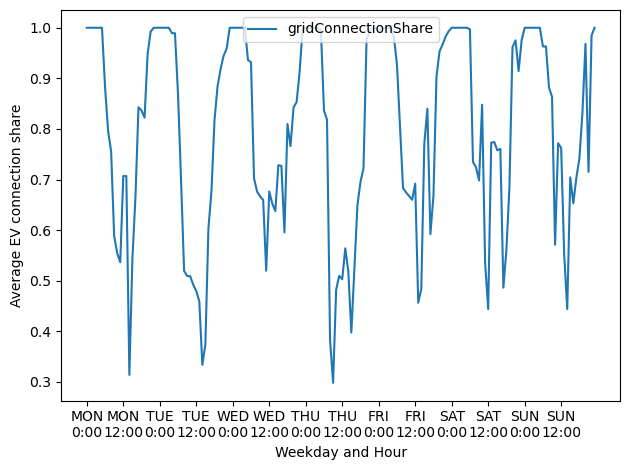

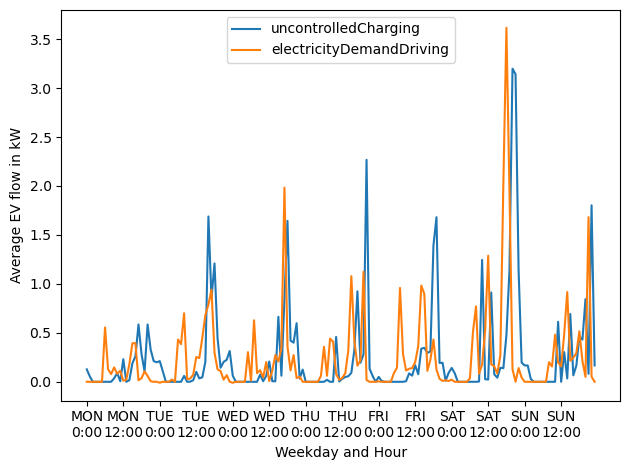

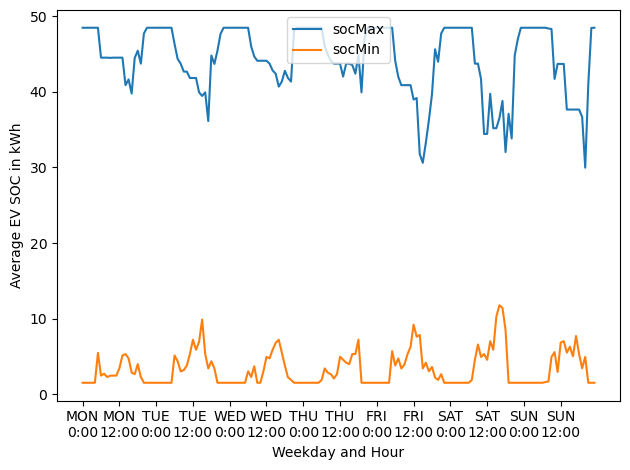

In [17]:
vpEval = Evaluator(configDict=configDict, parseData=pd.Series(data=vpData, index=[datasetID]))
vpEval.plotProfiles(flexEstimator=vpFlex)

To analyse its influence on the demand-side flexibility from EV, we will though charge the assumed size of the battery from 50 kWh to 75 kWh.

In [30]:
configDict['flexConfig']['inputDataScalars']['Battery_capacity'] = 100.0
configDict['flexConfig']['inputDataScalars']['Electric_consumption'] = 10.0

#yaml.dump(configDict['flexConfig'], sys.stdout)

In [31]:
# Estimate charging flexibility based on driving profiles and charge connection
vpFlex = FlexEstimator(configDict=configDict, datasetID=datasetID, ParseData=vpData)
vpFlex.baseProfileCalculation()
vpFlex.filter()
vpFlex.aggregate()
vpFlex.correct()
vpFlex.normalize()
vpFlex.writeOut()

Reading Venco input scalars, drive profiles and boolean plug profiles
There are 267 drive profiles and 267 plug profiles.
Flex Estimator initialization complete
Starting with iteration 0
9979.88276923077
Starting with iteration 1
0.0
Starting with iteration 2
0.0
0.0
0.0
0.0
Base profile calculation complete for dataset MiD17
There are 263 considered profiles and 262 DSM eligible profiles.


Evaluator initialization complete


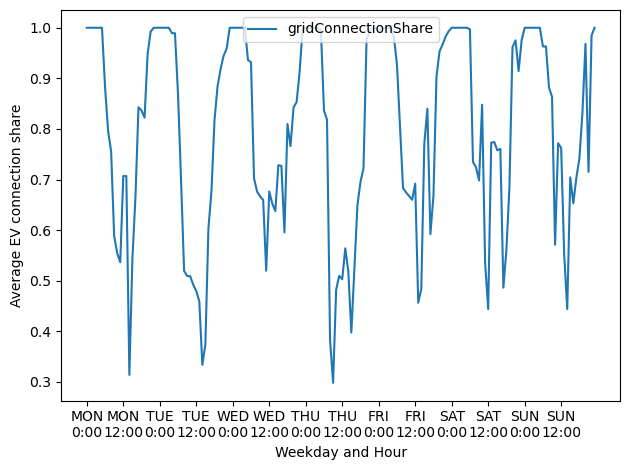

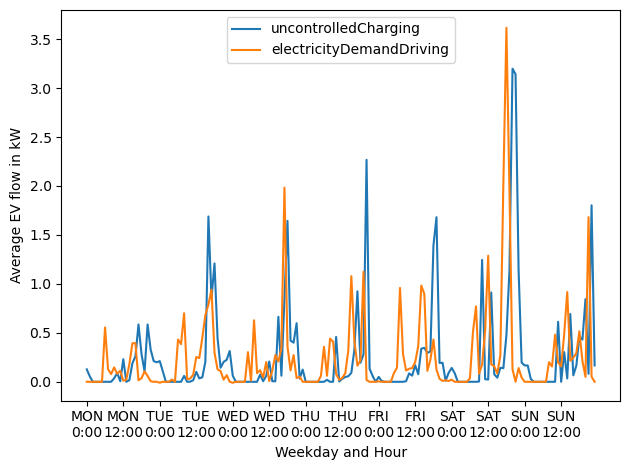

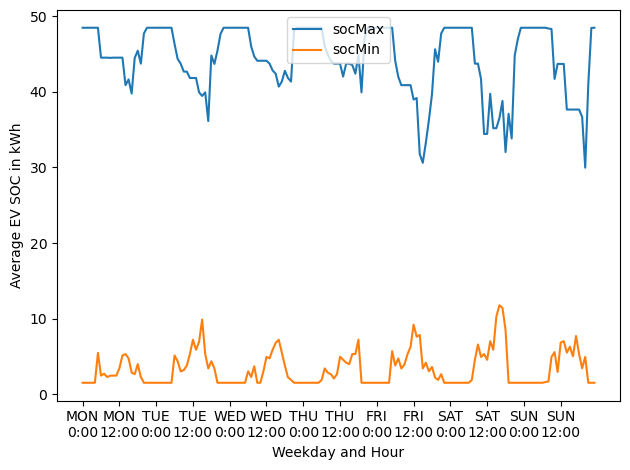

In [32]:
vpEval = Evaluator(configDict=configDict, parseData=pd.Series(data=vpData, index=[datasetID]))
vpEval.plotProfiles(flexEstimator=vpFlex)

By doubling the battery capacity we cannot really see from the graphs distinctive changes but we see that, as a result, we have 3 more profiles considered.

## Next Steps

Come back, there will be more upcoming tutorials! :)